### Importing requred librabries
these are useful as they are needed to run all the fuctions in our notebook

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
import tensorflow as tf
import matplotlib.pyplot as plt 
from skimage import io
from tqdm import tqdm
import numpy as np 
import os 
import shutil
import random
import pandas as pd
import cv2 as cv
# from PIL import Image


## **Generating xtrain and ytrain**
Here we are generating xtrain, for that we have to go through the following steps -

1)locate to the train folder

2)convert the images to grayscale, we ae converting to grayscale as other colors aren't present in our dataset, black and white are the colors available

3)resize the image to 28,28. We are doing this as the standard MNIST dataset is also in 28,28. also cause 28x28 pixels are enough to train ou model

4)appending the image pixels value and label in an array to finally get our xtrain

In [90]:
train_dir = os.listdir(r'E:\Internship\IIITD MIDAS\Task 2.2\Dataset\train')
root_dir = r'E:\Internship\IIITD MIDAS\Task 2.2\Dataset'

X = []
f=0
for cls in train_dir:
  src = root_dir+ '\\train\\' + cls
  allFileNames = os.listdir(src)
  a = cls
  a = a[-2:]
  p = int(a)
  p
  # print(cls)
  # # print(src + '/'+ allFileNames)
  
  for img in allFileNames:
    # ytrain.append(p)
    IMG_LOC=src+'\\'+img
    # image = io.imread(IMG_LOC)
    image=cv.imread(IMG_LOC, cv.IMREAD_GRAYSCALE)
    image=cv.resize(image,(28,28))
    print(f)
    f=f+1
    # testing_data.append([np.array(img),img_num])
    X.append([np.array(image),np.array(p)])
  # print(X)
  # print(ytrain)
    # print(image)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### Reshaping the array X and dividing it in Xtrain and Ytrain. We need xtrain and y train to train our model

In [91]:
x_train = np.array([i[0] for i in X]).reshape(-1,28,28,1)
y_train = np.array([i[1] for i in X])

### Printing the shape of Xtrain and Ytrain, to verify if its same as what we need in our model

In [92]:
print(x_train.shape)
print(y_train.shape)


(340, 28, 28, 1)
(340,)


## Generating Xtest and Ytest
#### Following the same steps as we did for xtrain and ytrain

In [93]:
train_dir = os.listdir(r'E:\Internship\IIITD MIDAS\Task 2.2\Dataset\test')
# img=cv.imread("/content/drive/MyDrive/IIITD/data/Sample027/img027-004.png", cv.IMREAD_GRAYSCALE)
root_dir = r'E:\Internship\IIITD MIDAS\Task 2.2\Dataset'
# os.makedirs(root_dir + '/train')

y = []
# ytrain = []
f=0
for cls in train_dir:
    src = root_dir+ '\\test\\' + cls
    allFileNames = os.listdir(src)
    a = cls
    a = a[-2:]
    p = int(a)
    p
#     print(cls)
    # # print(src + '/'+ allFileNames)
    for img in allFileNames:
        # ytrain.append(p)
        IMG_LOC=src+'\\'+img
        # image = io.imread(IMG_LOC)
        image=cv.imread(IMG_LOC, cv.IMREAD_GRAYSCALE)
        image=cv.resize(image,(28,28))
        # testing_data.append([np.array(img),img_num])
        y.append([np.array(image),np.array(p)])
        print(f)
        f=f+1
# print(y)
  # print(ytrain)
    # print(image)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [94]:
x_test = np.array([i[0] for i in y]).reshape(-1,28,28,1)
y_test = np.array([i[1] for i in y])

In [95]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)


(60, 28, 28, 1)
(60,)
(340, 28, 28, 1)
(340,)


## Data Normalization
As the CNN algorithm converge faster on the [0..1] data than on [0..255]

In [96]:
x_train, x_test=x_train/255.0, x_test/255.0
y_train, y_test=y_train.flatten(), y_test.flatten()

In [97]:
y_train

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7

## Label encoding
We need to give the y test and train in one hot encoded form

used this article for Label encoding - https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

it basically converts all the labels from 0 to the end. so that it becomes easier in one hot encoding.

In [98]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
y_train= label_encoder.fit_transform(y_train)
y_train
# y_train.unique()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

#### Used the to_categorical function to convert the data to one hot encoded form

In [99]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
data = array(y_train)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
y_train = encoded

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


#### Same for Y test

In [100]:
label_encoder = preprocessing.LabelEncoder()
y_test= label_encoder.fit_transform(y_test)
  

In [101]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7,
       7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9], dtype=int64)

In [102]:
data = array(y_test)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
y_test = encoded

[0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 6
 6 6 6 6 6 7 7 7 7 7 7 8 8 8 8 8 8 9 9 9 9 9 9]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.

In [103]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)


(60, 28, 28, 1)
(60, 10)
(340, 28, 28, 1)
(340, 10)


## SAVING CHECKPOINTS
We need to save the checkpoints of our model, in case any error occurs in between our training

i refered this article to save checkpoints - https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6

In [106]:
checkpoint_path = "E:\Internship\IIITD MIDAS\Task 2.2\checkpoints\cp-{epoch:04d}.ckpt"

In [107]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq=20,
    verbose=1)

## Model

Importing required libraries

In [119]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

#### Here we have created a function to create a CNN model by adding the following Layers
I have added 2 convolution layers, with filer size as 32. Padding as Same, and activation function as relu

one Max Pooling layer with pool size 2,2 and 1 Droupout to prevent overfitting

I have repeated the above archetecture with a filter size of 64, as with more layers, the model might perform better

Finally i have added a flatten layer to flatten the input, so that i can feed it to the dense layer.

I have then added the dense layer with relu as activation function.

At last i have added another dense layer with softmax as activation function because my final output has 62 classes. 

After this i have added the required optimizers and i have finally compiled the model

In [120]:
def create_model():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    
    optimizer = RMSprop(lr=0.001,
                        rho=0.9,
                        epsilon=1e-08,
                        decay=0.0)
    
    model.compile(optimizer = optimizer ,
                  loss = "categorical_crossentropy",
                  metrics=["accuracy"])
    return model

#### Creating a Model

In [121]:
model_ckpt= create_model()

#### Setting the number of epochs and batch size

In [122]:
epochs = 300 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

## Data Augmentation
#### In data augmentation, we add a few image to the training dataset, with a little variation such as rotation or whitening and fliping of images. We do so, so that our model do not over fit.

#### Getting over fit means our model will get so much used to our training dataset, that its prediction on new images will be very faulty

In [123]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

#### We are finally running the model we have built, by giving all the attributes to the model.fit_generator function

In [124]:

history = model_ckpt.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (x_test,y_test),
                              verbose = 2,
                              steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[cp_callback])

Epoch 1/300
3/3 - 1s - loss: 2.4945 - accuracy: 0.0984 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 2/300
3/3 - 1s - loss: 2.3145 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1667
Epoch 3/300
3/3 - 1s - loss: 2.3057 - accuracy: 0.0787 - val_loss: 2.3022 - val_accuracy: 0.1000
Epoch 4/300
3/3 - 1s - loss: 2.3042 - accuracy: 0.1181 - val_loss: 2.3022 - val_accuracy: 0.1000
Epoch 5/300
3/3 - 1s - loss: 2.3036 - accuracy: 0.0969 - val_loss: 2.3023 - val_accuracy: 0.1000
Epoch 6/300
3/3 - 1s - loss: 2.3037 - accuracy: 0.1024 - val_loss: 2.3021 - val_accuracy: 0.0667
Epoch 7/300

Epoch 00007: saving model to E:\Internship\IIITD MIDAS\Task 2.2\checkpoints\cp-0007.ckpt
3/3 - 1s - loss: 2.3055 - accuracy: 0.0709 - val_loss: 2.3019 - val_accuracy: 0.1000
Epoch 8/300
3/3 - 1s - loss: 2.3043 - accuracy: 0.1024 - val_loss: 2.3021 - val_accuracy: 0.1000
Epoch 9/300
3/3 - 1s - loss: 2.3040 - accuracy: 0.0906 - val_loss: 2.3021 - val_accuracy: 0.1500
Epoch 10/300
3/3 - 1s - loss: 2.3047 

### Calculating the final accuracy and loss

In [125]:
loss,acc = model_ckpt.evaluate(x_test,  y_test, verbose=2)

2/2 - 0s - loss: 0.4376 - accuracy: 0.9167


### Evaluation


In [126]:
model = model_ckpt

### Plotting the loss and accuracy curves for training and validation

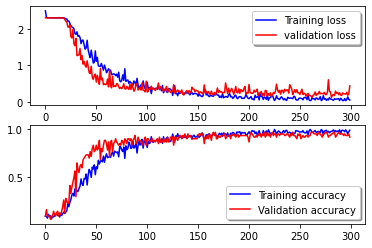

In [127]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [87]:
model = model_ckpt

### Plotting the Confusion matrix

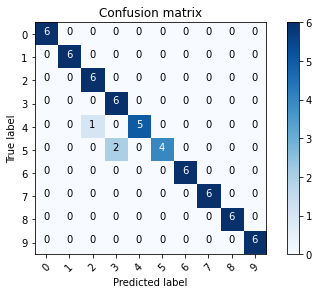

In [88]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

## loading pretrained
#### here we are loading the weights of the model which we have just trained so that we can train the MNIST data set on those predefined weights


In [44]:
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)

In [45]:
model_ckpt_MNIST = create_model()
model_ckpt_MNIST.load_weights(latest)

In [46]:
loss,acc = model_ckpt_MNIST.evaluate(x_test,  y_test, verbose=2)

2/2 - 0s - loss: 0.3474 - accuracy: 0.9500


In [47]:
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Restored model, accuracy: 95.00%


## Importing dataset
Here we are importing MNIST official dataset, so that e can train our model on it

We are also printing the sample train images to check if we have imported the correct dataset

I have used this to know how to import - https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python

In [49]:
from keras.datasets import mnist

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


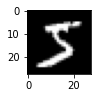

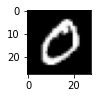

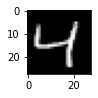

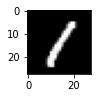

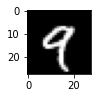

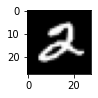

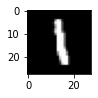

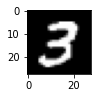

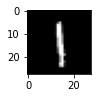

In [50]:
#loading
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
#shape of dataset
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))
 
#plotting
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

### Reshaping the array Xtrain and ytrain, so that it has the same dimension as the one required by our model

In [51]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

### Printing the shape of Xtrain and Ytrain, to verify if its same as what we need in our model

In [52]:
#shape of dataset
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28, 1)
Y_train: (60000,)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000,)


## Label encoding
We need to give the y test and train in one hot encoded form

used this article for Label encoding - https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

it basically converts all the labels from 0 to the end. so that it becomes easier in one hot encoding.

In [53]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
y_train= label_encoder.fit_transform(y_train)
y_train
# y_train.unique()

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

#### Used the to_categorical function to convert the data to one hot encoded form

In [54]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
data = array(y_train)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
y_train = encoded

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


#### Same for Y test

In [55]:
label_encoder = preprocessing.LabelEncoder()
y_test= label_encoder.fit_transform(y_test)
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [56]:
# define example
data = array(y_test)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
y_test = encoded

[7 2 1 ... 4 5 6]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [57]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## When trained on given dataset and tested on MNIST test data -
Now we have changed our xtest and ytest to the standard MNIST dataset

Here we are testing our already trained weights from the small dataset on the big MNIST test data

In [60]:
loss,acc = model_ckpt_MNIST.evaluate(x_test,  y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

313/313 - 12s - loss: 2547.1548 - accuracy: 0.1588
Restored model, accuracy: 15.88%


As we can see the accuracy is just 15% as our dataset was very small

## Train our Pre trained weights on MNIST Dataset

In [61]:
checkpoint_path = "E:\Internship\IIITD MIDAS\Task 2.2\checkpoints\withMNIST\cp-{epoch:04d}.ckpt"

In [62]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq=200,
    verbose=1)

In [63]:
# # model_ckpt2.fit(train_images, 
#           train_labels,  
#           batch_size=64,
#           epochs=10,
#           validation_data=(test_images,test_labels),
#           callbacks=[cp_callback])


history = model_ckpt_MNIST.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 10,
                              validation_data = (x_test,y_test),
                              verbose = 2,
                              steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[cp_callback])

Epoch 1/10

Epoch 00001: saving model to E:\Internship\IIITD MIDAS\Task 2.2\checkpoints\withMNIST\cp-0001.ckpt

Epoch 00001: saving model to E:\Internship\IIITD MIDAS\Task 2.2\checkpoints\withMNIST\cp-0001.ckpt

Epoch 00001: saving model to E:\Internship\IIITD MIDAS\Task 2.2\checkpoints\withMNIST\cp-0001.ckpt
697/697 - 455s - loss: 10.6294 - accuracy: 0.7872 - val_loss: 0.1255 - val_accuracy: 0.9649
Epoch 2/10

Epoch 00002: saving model to E:\Internship\IIITD MIDAS\Task 2.2\checkpoints\withMNIST\cp-0002.ckpt

Epoch 00002: saving model to E:\Internship\IIITD MIDAS\Task 2.2\checkpoints\withMNIST\cp-0002.ckpt

Epoch 00002: saving model to E:\Internship\IIITD MIDAS\Task 2.2\checkpoints\withMNIST\cp-0002.ckpt
697/697 - 476s - loss: 0.2070 - accuracy: 0.9450 - val_loss: 0.0457 - val_accuracy: 0.9854
Epoch 3/10

Epoch 00003: saving model to E:\Internship\IIITD MIDAS\Task 2.2\checkpoints\withMNIST\cp-0003.ckpt

Epoch 00003: saving model to E:\Internship\IIITD MIDAS\Task 2.2\checkpoints\withMNI

In [ ]:
loss,acc = model_ckpt_MNIST.evaluate(x_test,  y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

2/2 - 0s - loss: 0.0717 - accuracy: 0.9836
Restored model, accuracy: 98.36%

### Evaluation


### Plotting the loss and accuracy curves for training and validation

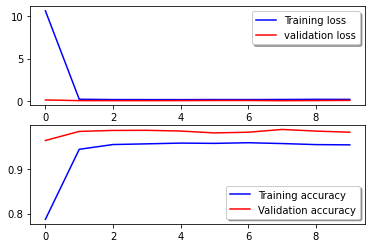

In [65]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [69]:
model = model_ckpt_MNIST

### Plotting the Confusion matrix

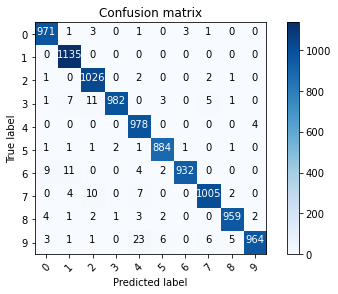

In [70]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 